In [1]:
import torchvision.models as models
import torchvision.transforms as transforms

In [2]:
from torch.utils.data import DataLoader,Dataset

In [3]:
import torchvision
import torch

In [4]:
VGG16=models.vgg16(pretrained=True)

In [13]:
pipeline=transforms.Compose([transforms.Resize((150,150)),
                            transforms.RandomRotation(degrees=[0,10]),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

In [14]:
path_train="/Users/gunnvantsaini/Data/Work/ML Course/Module 5 Neural Networks/Data/waffle_pancakes/train"
train_dataset=torchvision.datasets.ImageFolder(path_train,pipeline)

In [15]:
train_dataset.classes

['pancakes', 'waffles']

In [20]:
dat=DataLoader(train_dataset,batch_size=32,shuffle=True)

In [21]:
next(iter(dat))

[tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           ...,
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
          [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           ...,
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
          [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
           [-

In [22]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [26]:
for p in VGG16.parameters():
    p.requires_grad=False

In [27]:
from torch import nn

In [28]:
VGG16.classifier=nn.Sequential(nn.Linear(512*7*7,120),
                              nn.ReLU(),
                              nn.Linear(120,2),
                              nn.Softmax(dim=1))

In [29]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [30]:
for p in VGG16.parameters():
    print(p.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True


In [31]:
import torch.optim as optim

In [32]:
opt=optim.Adagrad(VGG16.classifier.parameters())

In [33]:
criterion=nn.CrossEntropyLoss()

In [36]:
for i in range(2):
    n=0
    Loss=0
    for X,y in dat:
        p=VGG16(X)
        loss=criterion(p,y)
        loss.backward()
        Loss+=loss.item()
        opt.step()
        opt.zero_grad()
        n+=1
    print(f"Loss : {round(Loss/n,2)}")

Loss : 0.65
Loss : 0.5


In [37]:
#### class --->save the classfile
#### serialize those weights save them on disk
#### mod.eval()
#### p=mod(input)

In [38]:
## read waffle image
## do the necessary transformations
## I will get an input tensor
## p=VGG16(input)
## p.argmax()

In [39]:
train_pipline=transforms.Compose([transforms.RandomResizedCrop(224),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

In [40]:
path="/Users/gunnvantsaini/Downloads/seedling/train"
train=torchvision.datasets.ImageFolder(path,train_pipline)

In [41]:
train_dataloader=DataLoader(train,batch_size=32)

In [47]:
im1=next(iter(train))[0].permute(1,2,0).numpy()

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


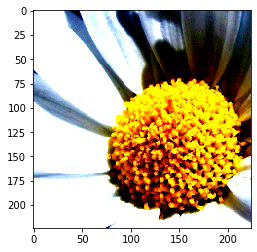

In [51]:
plt.imshow(im1)

In [54]:
resent=models.resnet34(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/gunnvantsaini/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [55]:
resent

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [56]:
for p in resent.parameters():
    p.requires_grad=False

In [57]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [58]:
resent

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [59]:
resent.fc=nn.Sequential(nn.Linear(512,5),
                       nn.Softmax(dim=1))

In [60]:
resent

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [61]:
for p in resent.parameters():
    print(p.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True


In [63]:
creteria=nn.CrossEntropyLoss()
opt=optim.SGD(resent.fc.parameters(),lr=0.01)

In [64]:
for i in range(2):
    Loss=0
    n=0
    for X,y in train_dataloader:
        p=resent(X)
        loss=creteria(p,y)
        loss.backward()
        opt.step()
        opt.zero_grad()
        Loss+=loss.item()
        n+=1
    print(f"Loss: {round(Loss/n,3)}")

Loss: 1.477


KeyboardInterrupt: 

In [65]:
### Single image=Only one class
#### Multiclass classification loss will always be CE
#### Multilabel image classification

In [66]:
### Multilabel classification: 
#X: will be image
# y: 

In [67]:
### Dataset
### Img, y[1,0,1,0,0]

In [69]:
import pandas as pd

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [70]:
meta=pd.read_csv("../sony/data/miml_dataset/miml_labels_1.csv")

In [71]:
meta.head(2)

,Filenames,desert,mountains,sea,sunset,trees
0,1.jpg,1,0,0,0,0
1,2.jpg,1,0,0,0,0


In [72]:
base_path="/Users/gunnvantsaini/OneDrive/project_codes/content/dl_basics/sony/data/miml_dataset/images"

In [73]:
img_path=base_path+"/1.jpg"

In [74]:
img_path

'/Users/gunnvantsaini/OneDrive/project_codes/content/dl_basics/sony/data/miml_dataset/images/1.jpg'

In [75]:
import PIL

In [76]:
list_of_images=[]
y=meta.drop('Filenames',axis=1).values

In [77]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [78]:
t=transforms.Compose([transforms.Resize((100,100)),
                     transforms.ToTensor()])

In [79]:
IMAGES=[]
for im in meta['Filenames']:
    path_img=base_path+"/"+im
    img=PIL.Image.open(path_img)
    img=t(img)
    IMAGES.append(img)

In [80]:
IMAGES[0].shape

torch.Size([3, 100, 100])

In [81]:
class MIML(Dataset):
    def __init__(self,images,y):
        self.images=images
        self.y=y
    def __len__(self):
        return len(self.y)
    def __getitem__(self,idx):
        x=self.images[idx]
        y=self.y[idx]
        batch={"X":x,"y":y}
        return batch

In [82]:
miml_data=MIML(IMAGES,y)

In [84]:
next(iter(miml_data))['X'].shape

torch.Size([3, 100, 100])

In [86]:
class Multilabel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block=nn.Sequential(nn.Conv2d(in_channels=3,out_channels=32,
                                               kernel_size=3,
                                               padding=1,
                                               stride=1),
                                     nn.ReLU(),
                                     nn.Conv2d(in_channels=32,out_channels=32,
                                              kernel_size=3,
                                              padding=1,
                                              stride=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(kernel_size=2,stride=2,padding=0),
                                     nn.ReLU(),
                                     nn.Conv2d(in_channels=32,out_channels=64,
                                              kernel_size=3,
                                              padding=1,
                                              stride=1),
                                     nn.ReLU(),
                                     nn.Conv2d(in_channels=64,out_channels=64,
                                              kernel_size=3,
                                              padding=1,
                                              stride=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(kernel_size=2,stride=2,padding=0))
        self.classifier=nn.Sequential(nn.Linear(64*25*25,512),
                                      nn.ReLU(),
                                      nn.Linear(512,5),
                                      nn.Sigmoid())
    def forward(self,X):
        X=self.conv_block(X)
        X=X.view(-1,X.shape[1]*X.shape[2]*X.shape[3])
        X=self.classifier(X)
        return X